# Regression Tree: Python Exercise

## Define the performance evaluation function

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# Performance evaluation function for regression --------------------------
def perf_eval_reg(tgt_y, pre_y):
    # RMSE
    rmse = np.sqrt(np.mean((tgt_y - pre_y)**2))
    # MAE
    mae = np.mean(np.abs(tgt_y - pre_y))
    # MAPE
    mape = 100 * np.mean(np.abs((tgt_y - pre_y) / tgt_y))

    return rmse, mae, mape

In [4]:
# Performance table
Perf_Table = pd.DataFrame(index=["MLR", "Regression Tree"],
                          columns = ["RMSE", "MAE", "MAPE"])
Perf_Table

,RMSE,MAE,MAPE
MLR,NaN,NaN,NaN
Regression Tree,NaN,NaN,NaN


## Load the dataset and Convert “Fule_Type” variable to three dummy variables

In [5]:
# Load the dataset
corolla = pd.read_csv("ToyotaCorolla.csv")

# Regression model 1: multivariate linear regression (MLR)
id_idx = [0,1]
category_idx = 7
target_column = "Price"
corolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# Transform a categorical variable into a set of binary variables
corolla = pd.get_dummies(corolla, 
                         columns=[corolla.columns[category_idx]], 
                         prefix='', #Diesel 앞에 뭐가 붙어질지
                         prefix_sep='')
corolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,90,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,90,1,0,...,0,0,0,1,0,0,0,0,1,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,90,0,0,...,0,0,0,1,0,0,0,0,1,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,90,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,86,1,0,...,0,1,1,1,0,0,0,0,0,1
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,86,0,0,...,0,0,1,1,0,0,0,0,0,1
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,86,0,0,...,0,0,0,1,0,0,0,0,0,1
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,86,1,0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
# Prepare the data
corolla_mlr_data = corolla.drop(corolla.columns[id_idx], axis=1)
corolla_target = corolla_mlr_data[target_column]
corolla_input = corolla_mlr_data.drop(target_column, axis=1)

In [8]:
corolla_mlr_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,0,0,1
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,0,0,1
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,0,0,1
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,0,0,1


In [9]:
corolla_target

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [10]:
corolla_input

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,23,10,2002,46986,90,1,0,2000,3,4,...,0,0,0,1,0,0,0,0,1,0
1,23,10,2002,72937,90,1,0,2000,3,4,...,0,0,0,1,0,0,0,0,1,0
2,24,9,2002,41711,90,1,0,2000,3,4,...,0,0,0,1,0,0,0,0,1,0
3,26,7,2002,48000,90,0,0,2000,3,4,...,0,0,0,1,0,0,0,0,1,0
4,30,3,2002,38500,90,0,0,2000,3,4,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,12,1998,20544,86,1,0,1300,3,4,...,0,1,1,1,0,0,0,0,0,1
1432,72,9,1998,19000,86,0,0,1300,3,4,...,0,0,1,1,0,0,0,0,0,1
1433,71,10,1998,17016,86,0,0,1300,3,4,...,0,0,0,1,0,0,0,0,0,1
1434,70,11,1998,16916,86,1,0,1300,3,4,...,0,0,0,1,0,0,0,0,0,1


## Train an MLR model and evaluate it with the test dataset

In [11]:
# Split the data into the training/validation sets
X_train, X_test, y_train, y_test = train_test_split(corolla_input, 
                                                    corolla_target, 
                                                    test_size=0.3,
                                                    random_state=12345)

# Train the MLR
MLP_corolla = LinearRegression().fit(X_train, y_train)

# Performance Measure
MLR_corolla_haty = MLP_corolla.predict(X_test)
Perf_Table.iloc[0] = perf_eval_reg(y_test, MLR_corolla_haty)
Perf_Table

,RMSE,MAE,MAPE
MLR,1219.170176,874.365151,8.648188
Regression Tree,NaN,NaN,NaN


## Train the full tree

RMSE: 1327.0772606312169
MAE: 1022.3851508120649
MAPE: 10.137390237265766


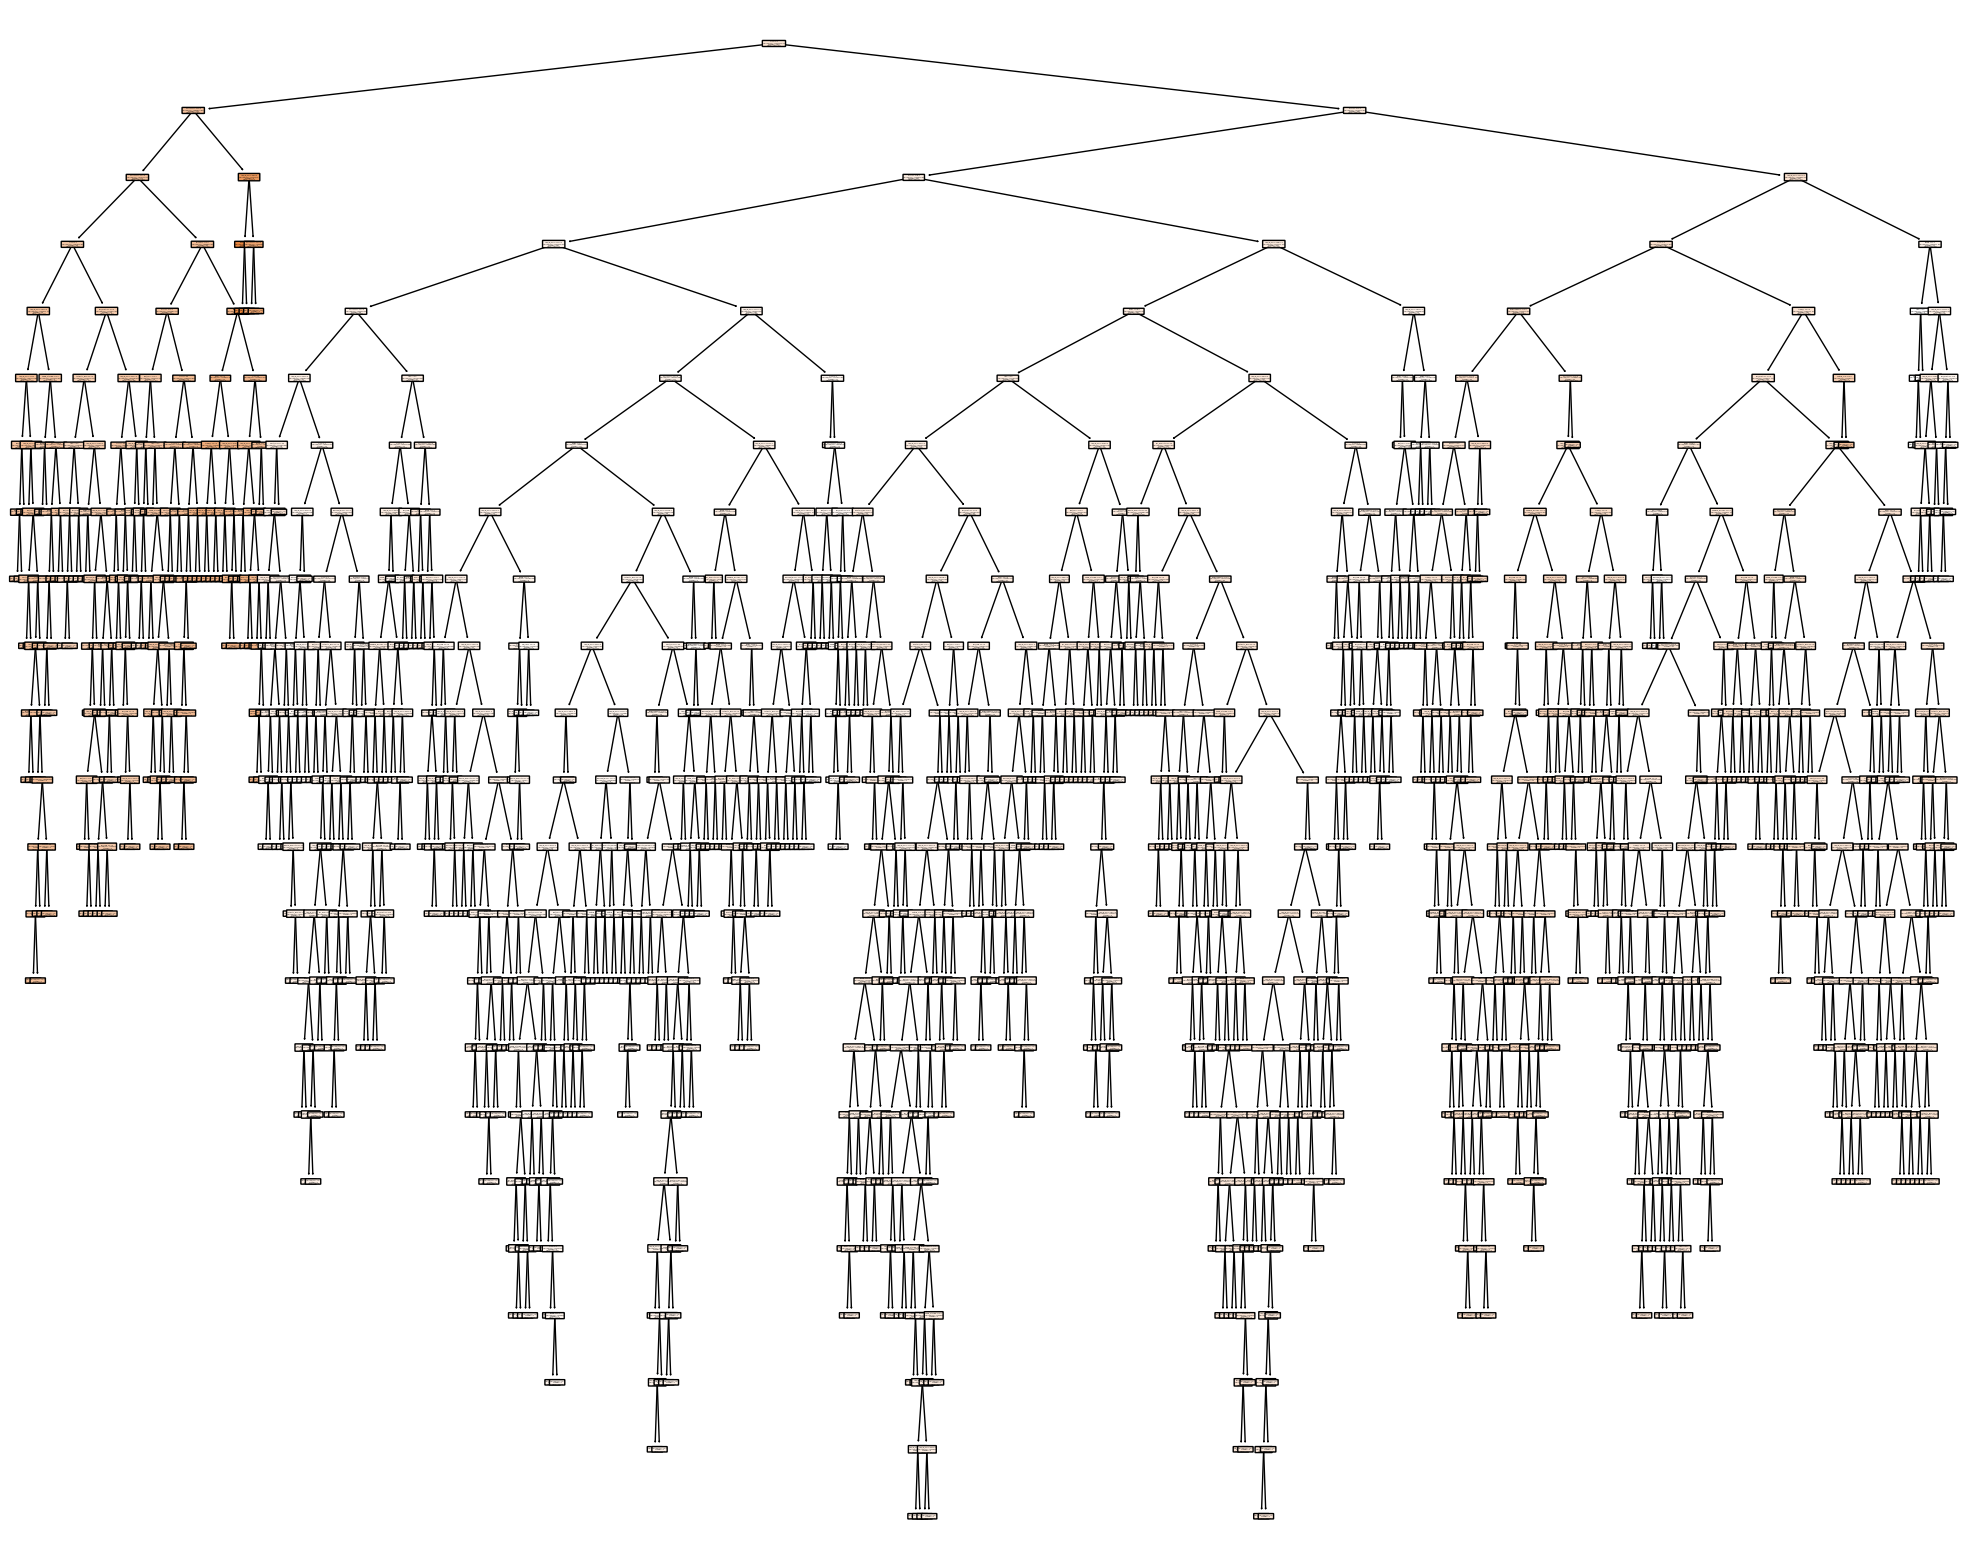

In [12]:
# Regression model 2: Regression Tree
# Training the tree
RT_corolla = DecisionTreeRegressor(random_state=12345)
RT_corolla.fit(X_train, y_train)

y_pred = RT_corolla.predict(X_test)
rmse, mae, mape = perf_eval_reg(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

# Plot the tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(RT_corolla,
              feature_names=corolla.columns.values,
              rounded=True,
              filled=True)
plt.show()

## Find the best tree based on cost complexity pruning

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

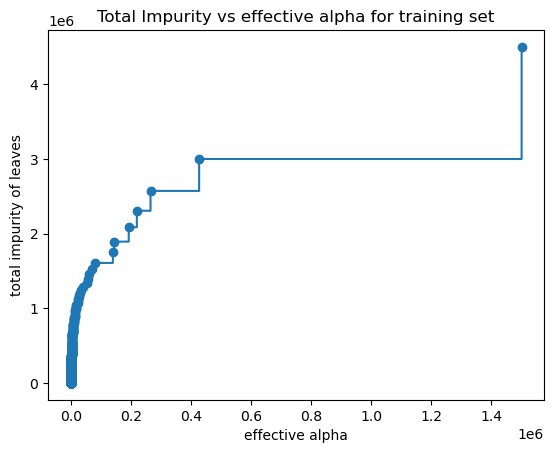

In [13]:
# Find the best tree
path = RT_corolla.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the impurity vs effective aplha
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

트리 구조가 단순해질 수록 impurity 높아짐

Number of nodes in the last tree is: 1 with ccp_alpha: 8719709.750471843


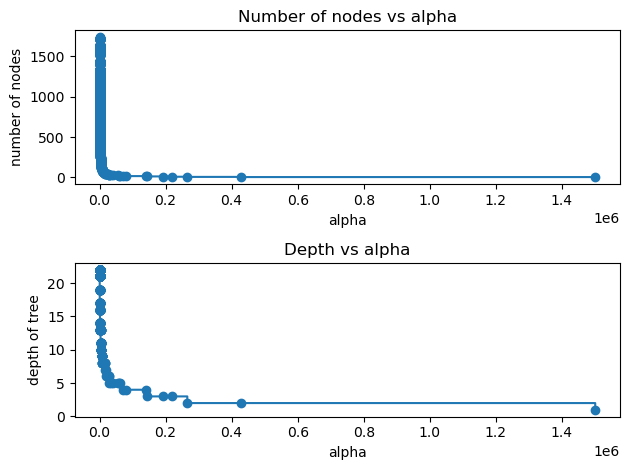

In [14]:
regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=12345, ccp_alpha=ccp_alpha)
    reg.fit(X_train, y_train)
    regs.append(reg)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        regs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

regs = regs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [reg.tree_.node_count for reg in regs]
depth = [reg.tree_.max_depth for reg in regs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

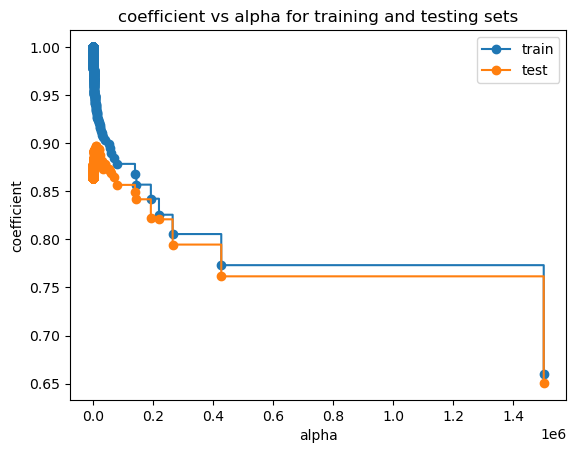

In [15]:
train_scores = [reg.score(X_train, y_train) for reg in regs]
test_scores = [reg.score(X_test, y_test) for reg in regs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("coefficient")
ax.set_title("coefficient vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

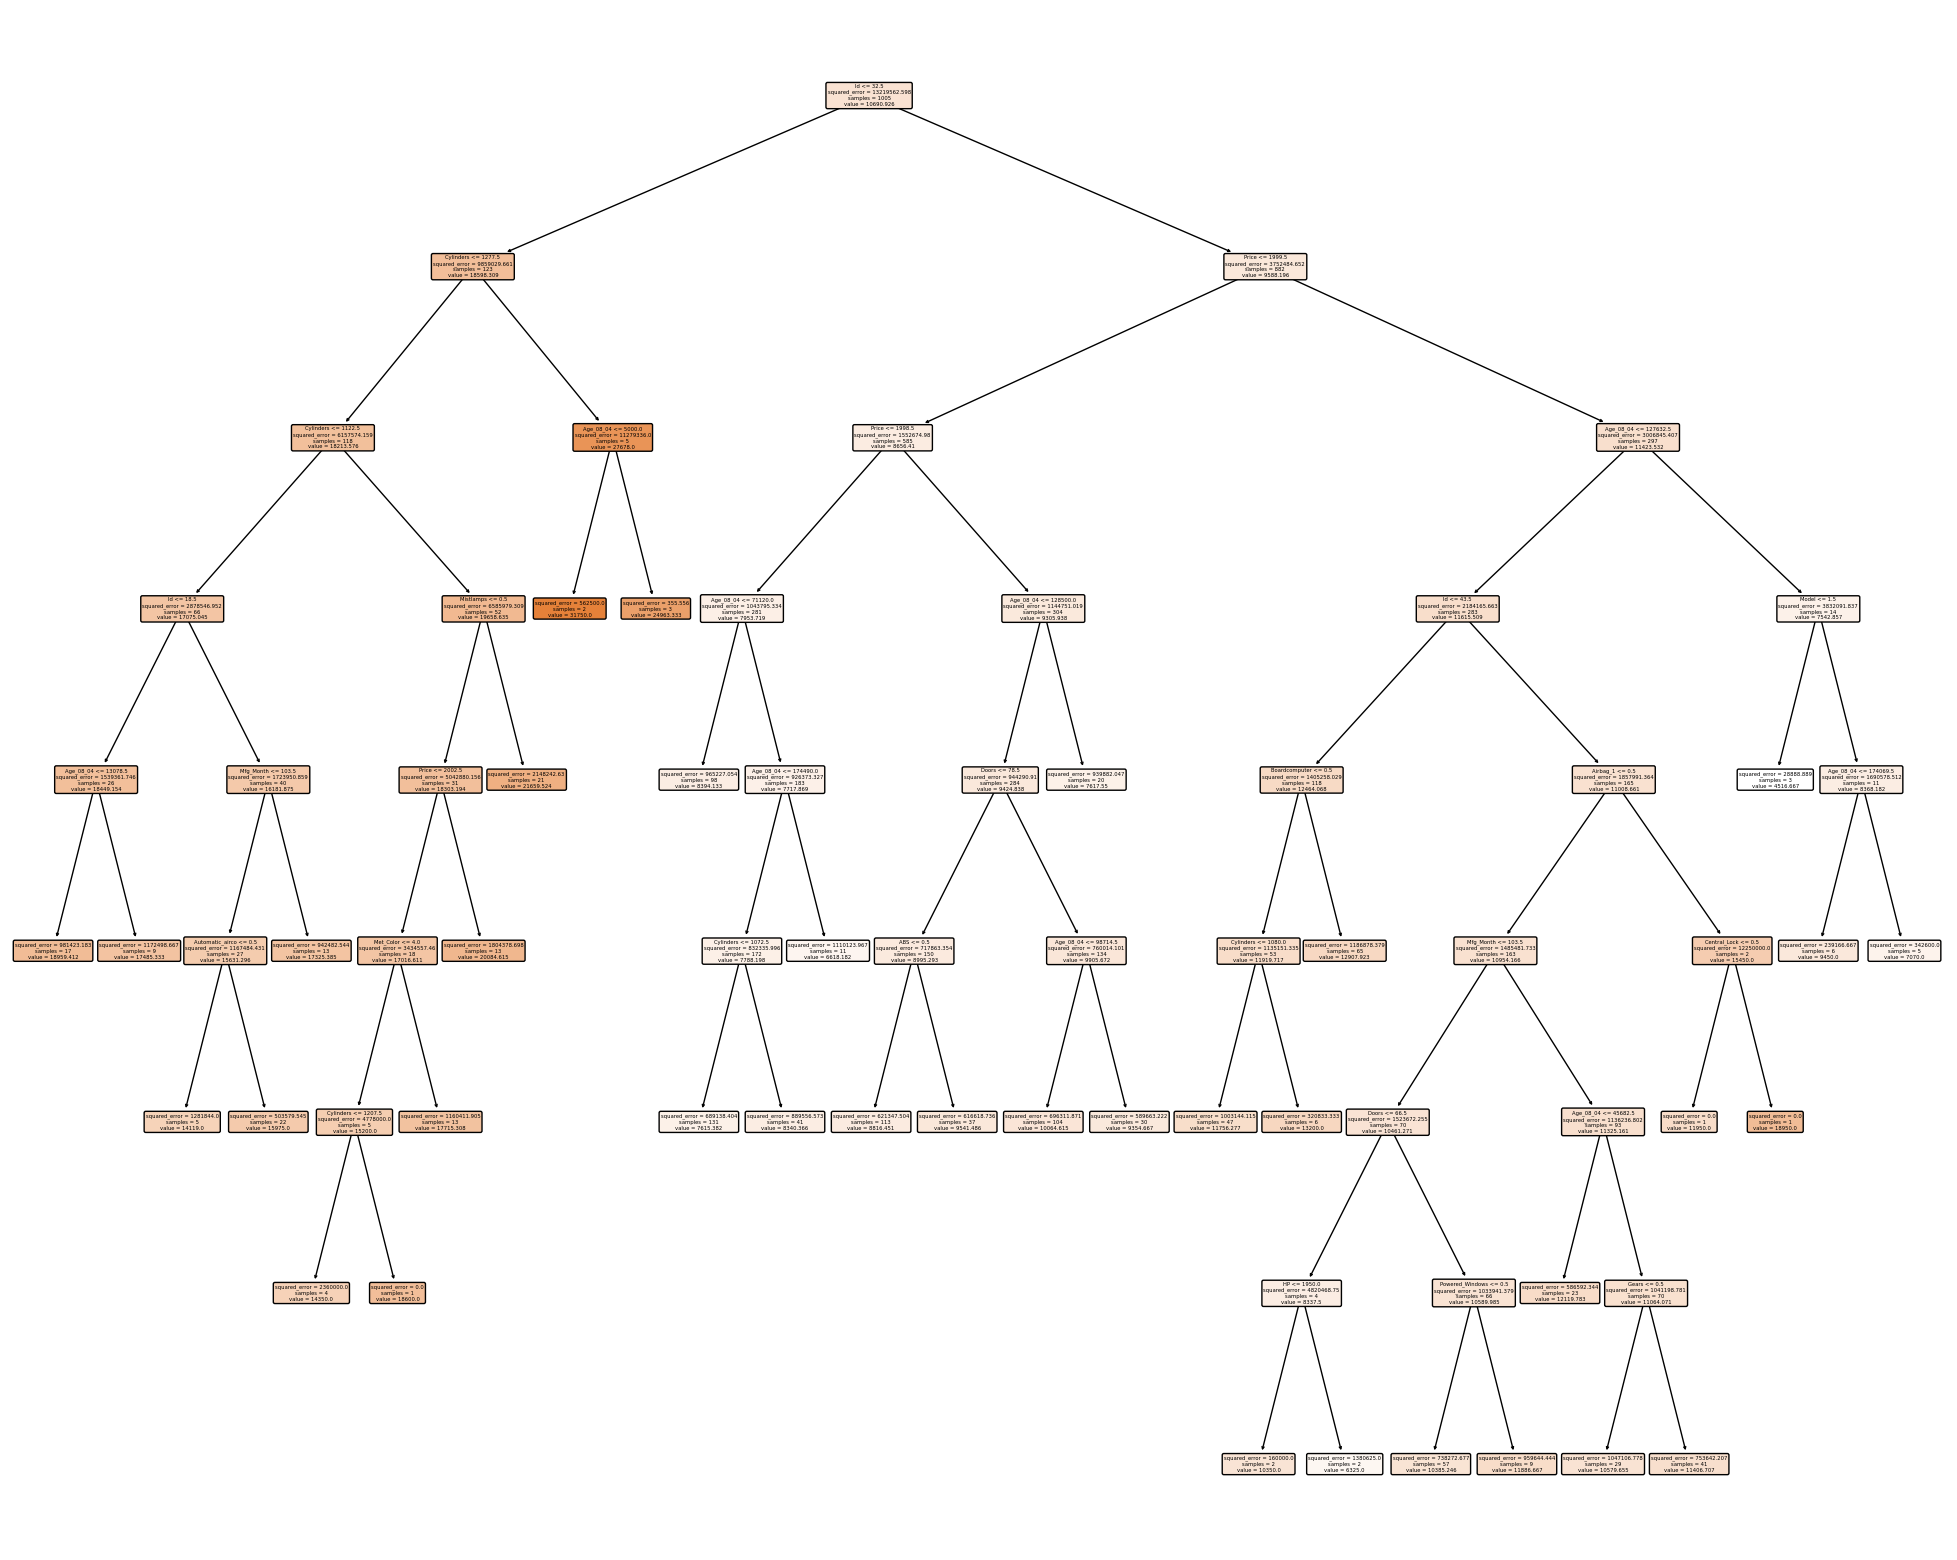

In [16]:
best_reg = regs[np.argmax(test_scores)]
fig = plt.figure(figsize=(25,20))
_ = plot_tree(best_reg,
              feature_names=corolla.columns.values,
              rounded=True,
              filled=True)

In [17]:
# Prediction
RT_corolla_prey = best_reg.predict(X_test)

# Compare the regression performance
Perf_Table.iloc[1] = perf_eval_reg(y_test, RT_corolla_prey)
Perf_Table

,RMSE,MAE,MAPE
MLR,1219.170176,874.365151,8.648188
Regression Tree,1157.076571,913.977212,9.14139


---